In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("TehranhousePrice.csv").drop(columns=["Price"])
data.head(30)

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,63,1,True,True,True,Shahran,61666.67
1,60,1,True,True,True,Shahran,61666.67
2,79,2,True,True,True,Pardis,18333.33
3,95,2,True,True,True,Shahrake Qods,30083.33
4,123,2,True,True,True,Shahrake Gharb,233333.33
5,70,2,True,True,False,North Program Organization,68333.33
6,87,2,True,True,True,Pardis,20000.00
7,59,1,True,True,True,Shahran,71666.67
8,54,2,True,True,False,Andisheh,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,79000.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(1), object(2)
memory usage: 119.0+ KB


In [ ]:
data = data.drop_duplicates("Address")
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,63,1,True,True,True,Shahran,61666.67
2,79,2,True,True,True,Pardis,18333.33
3,95,2,True,True,True,Shahrake Qods,30083.33
4,123,2,True,True,True,Shahrake Gharb,233333.33
5,70,2,True,True,False,North Program Organization,68333.33
...,...,...,...,...,...,...,...
3296,84,2,False,True,True,Vahidiyeh,19600.00
3297,69,1,True,True,True,Shadabad,29666.67
3323,42,1,False,False,False,Naziabad,21333.33
3404,63,3,False,True,False,Javadiyeh,48333.33


In [ ]:
data.var

,Room,Parking,Warehouse,Elevator,Price(USD)
Room,1.000000,0.216146,0.218546,0.075399,0.650585
Parking,0.216146,1.000000,0.285379,0.413470,0.179829
Warehouse,0.218546,0.285379,1.000000,0.122071,0.108036
Elevator,0.075399,0.413470,0.122071,1.000000,-0.057400
Price(USD),0.650585,0.179829,0.108036,-0.057400,1.000000


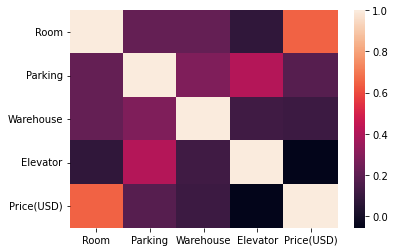

In [ ]:
sns.heatmap(data.corr())

In [ ]:
X = data.drop(columns=["Area","Price(USD)","Address"])
Y = data["Price(USD)"]


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict = model.predict(x_test)
y_predict

array([ 130490.53204428, -184855.74528829,  445836.80937685,
        445836.80937685,  259763.77153963,  445836.80937685,
        -55582.50579293,  445836.80937685,  445836.80937685,
        493688.26291006,  -55582.50579293,  445836.80937685,
       -142199.47601749,  130490.53204428, -184855.74528829,
        445836.80937685,  130490.53204428,  220998.25484829,
        445836.80937685,   49068.74608214,  575110.0488722 ,
        445836.80937685,  178341.98557749,  130490.53204428,
        445836.80937685,  130490.53204428,  130490.53204428,
        259763.77153963, -142199.47601749, -137004.29175507,
        445836.80937685,  130490.53204428,  130490.53204428,
        445836.80937685,  130490.53204428,  220998.25484829,
        130490.53204428,  130490.53204428,  178341.98557749])

In [ ]:
from sklearn import metrics
import math
MSE = metrics.mean_absolute_error(y_test,y_predict)
MAE = metrics.mean_squared_error(y_test,y_predict)
RMSE = RMSE = math.sqrt(MSE)

In [ ]:
MSE

183735.56570036305

In [ ]:
MAE

46669817370.401375

In [ ]:
RMSE

428.643868147397

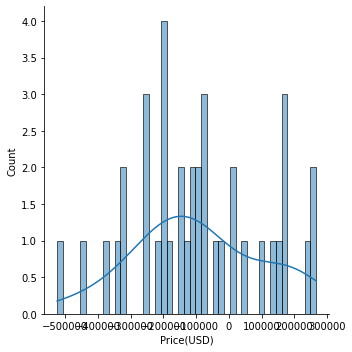

In [ ]:
error = y_test - y_predict
sns.displot(error,bins=45,kde=True)

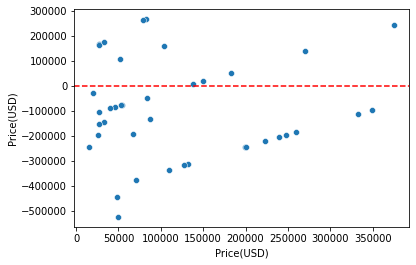

In [ ]:
sns.scatterplot(x=y_test,y=error)
plt.axhline(y=0,color='r',ls='--')